In [4]:
#Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pickle
import warnings 
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)

In [7]:
train_d = pd.read_csv('/kaggle/input/fraud-detection-dataset/fraudTrain.csv', low_memory=False, index_col=0)
test_d = pd.read_csv('/kaggle/input/fraud-detection-dataset/fraudTest.csv', low_memory=False, index_col=0)

In [8]:
train_d.shape, test_d.shape

((1296675, 22), (555719, 22))

In [10]:
df_train = pd.concat([train_d, test_d],ignore_index=True)

In [18]:
df_train.shape

(1852394, 22)

In [19]:
df_train.is_fraud.value_counts()


is_fraud
0    1842743
1       9651
Name: count, dtype: int64

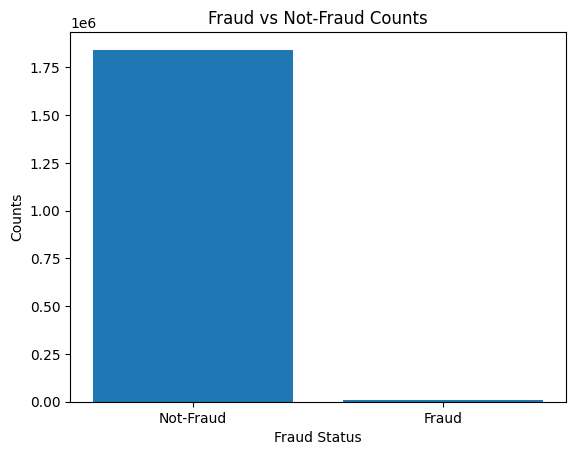

In [20]:
# Making Bar Chart for counting Fraud and not-Fraud
import matplotlib.pyplot as plt

values_counts = df_train['is_fraud'].value_counts()

# Plotting the bar chart
plt.bar(['Not-Fraud', 'Fraud'], values_counts.values)

# Adding labels and title
plt.xlabel('Fraud Status')
plt.ylabel('Counts')
plt.title('Fraud vs Not-Fraud Counts')

plt.show()



In [23]:
def clean_train_df(df_d):
    return df_d.drop(['cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num','trans_date_trans_time'],axis=1)

df = clean_train_df(df_train)

In [24]:
df.head(2)

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,36.011293,-82.048315,0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,1325376044,49.159047,-118.186462,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 12 columns):
 #   Column      Dtype  
---  ------      -----  
 0   merchant    object 
 1   category    object 
 2   amt         float64
 3   gender      object 
 4   lat         float64
 5   long        float64
 6   city_pop    int64  
 7   job         object 
 8   unix_time   int64  
 9   merch_lat   float64
 10  merch_long  float64
 11  is_fraud    int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 169.6+ MB


In [26]:
train_d, test_d = train_test_split(df, test_size=0.2, shuffle=True, random_state=42)
train = train_d.reset_index(drop=True)
test = test_d.reset_index(drop=True)
train.shape, test.shape

((1481915, 12), (370479, 12))

In [28]:
df_object = train.select_dtypes(include=['object'])
Encoders = {}

for cols in df_object.columns:
    Encoder = LabelEncoder()
    train[cols] = Encoder.fit_transform(train[cols])
    Encoders[cols] = Encoder

with open('LE_mdl_v1.pkl', 'wb') as f:
    pickle.dump(Encoders, f)

In [29]:
train.head(2)

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,29,4,166.80,1,39.3426,-114.8859,450,254,1371108903,40.088507,-113.895268,0
1,536,11,28.86,0,34.3795,-118.5230,34882,219,1347476946,35.356925,-119.348148,0


In [30]:
X = train.drop(columns=['is_fraud'])
Y = train['is_fraud']

In [31]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=42)

In [32]:
Model1 = DecisionTreeClassifier()
Model2 = LogisticRegression()
Model3 = RandomForestClassifier()

In [36]:
from sklearn.metrics import confusion_matrix

def Model_Train(Model, X_train, Y_train, X_test, Y_test):
    Model.fit(X_train, Y_train)
    Y_pred = Model.predict(X_test)

    print('Accuracy Score of Model:', accuracy_score(Y_test, Y_pred))
    print(classification_report(Y_test, Y_pred))
    print('Confusion Matrix:')
    print(confusion_matrix(Y_test, Y_pred))
    
    with open(str(Model)[:3] + '_mdl.pkl', 'wb') as f:
        pickle.dump(Model, f)


In [37]:
Model_Train(Model1, X_train, Y_train, X_val, Y_val)

Accuracy Score of Model: 0.996079397266375
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    294805
           1       0.63      0.65      0.64      1578

    accuracy                           1.00    296383
   macro avg       0.81      0.82      0.82    296383
weighted avg       1.00      1.00      1.00    296383

Confusion Matrix:
[[294193    612]
 [   550   1028]]


In [38]:
Model_Train(Model2, X_train, Y_train, X_val, Y_val)

Accuracy Score of Model: 0.9946758079916864
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    294805
           1       0.00      0.00      0.00      1578

    accuracy                           0.99    296383
   macro avg       0.50      0.50      0.50    296383
weighted avg       0.99      0.99      0.99    296383

Confusion Matrix:
[[294805      0]
 [  1578      0]]


In [39]:
Model_Train(Model3, X_train, Y_train, X_val, Y_val)

Accuracy Score of Model: 0.9976078250102064
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    294805
           1       0.86      0.66      0.75      1578

    accuracy                           1.00    296383
   macro avg       0.93      0.83      0.87    296383
weighted avg       1.00      1.00      1.00    296383

Confusion Matrix:
[[294636    169]
 [   540   1038]]
